# Project 1

##### Supervised Learning: Classification

##### Course: T-504-ITML, Date: 04/10/24, Instructor: Christoph Lohrmann, Student: Þórdís M. Eiríksdóttir

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction

#### The Chosen Dataset

The dataset I chose to work with is called "Drug Consumption (Quantified)".<br>
It has a total of 1885 instances and 32 variables (including ID) to consider. <br>

5 of these variables are [appropriate word]; age, gender, education, country, ethnicity. <br>
7 of them are scores from personality tests. The traits they measured were the following:
<ul>
    <li>Neuroticism [nscore]</li>
    <li>Extraversion [escore]</li>
    <li>Openness to experience [oscore]</li>
    <li>Agreeableness [ascore]</li>
    <li>Conscientiousness [cscore]</li>
    <li>Impulsiveness [impuslive]</li>
    <li>Sensation seeking [ss]</li>
</ul>

The dataset also has 19 drug-columns, ranging from alcohol to VSA. Here are all possible answers for each:
<ul>
    <li>Never Used [CL0]</li>
    <li>Used over a Decade Ago [CL1]</li>
    <li>Used in Last Decade [CL2]</li>
    <li>Used in Last Year [CL3]</li>
    <li>Used in Last Month [CL4]</li>
    <li>Used in Last Week [CL5]</li>
    <li>Used in Last Day [CL6]</li>
</ul>

Here is a link to the database: <br>
<a> https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified </a>

#### The Problem I'd Like to Solve

My goal is simple. I'd like to predict whether a person has ever tried magic mushrooms, be it within the last day or over a decade ago. So we're classifying instances as 'mushroom-triers' and 'mushroom-non-triers'.

## Understanding and Preparing the Data

In [3]:
drug_consumption_quantified = fetch_ucirepo(id=373) 
drug_data = drug_consumption_quantified.data
X = drug_data.features 
y = drug_data.targets 

The dataset's features look like this:

In [4]:
X.head(3)

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148


Although note that within the context of the problem, whether the person has tried any other drug is also a feature that can be used to make the prediction. Our only target is the 'mushroom' column, and every other column is a feature.

The targets, in turn, look like this:

In [5]:
y.head(3)

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


I will be simplifying these values into a binary form of 'has tried' and 'has not tried', given that that that's what I'm trying to predict. <br>
It's possible that a person is more likely to have tried shrooms if they've also smoked weed within the last day, rather than only within the decade, but I doubt that. <br>
Besides, a binary 'has tried' or 'hasn't' will be easier to work with. 

In [6]:
vars = ['id', 'age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack','ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
df = pd.DataFrame(drug_data.original, columns=vars)

df.describe()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


After staring at this wall of numbers for a minute, I could spot some interesting things. <br>
Namely, that the etnicity number '-0.31685' can be seen at the 25%, 50% and 75% markers in the 'ethnicity' column. According to the database's descriptions, this is the number that represents 'white'. It's safe to say that the vast majority of the people interviewed were white. <br>
I'd like to graph this difference, actually.

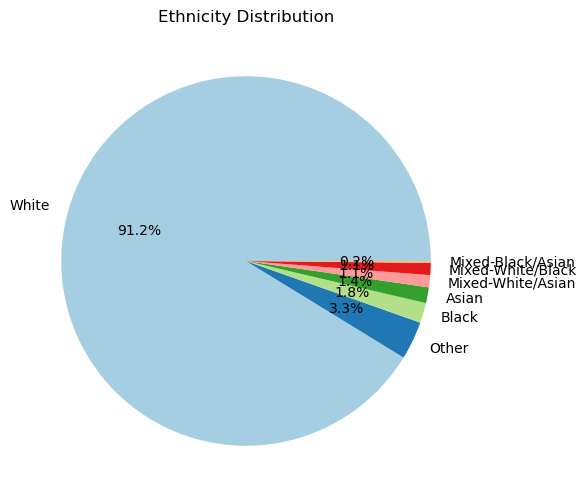

In [7]:
ethnicity_mapping = { -0.50212: 'Asian', -1.10702: 'Black', 1.90725: 'Mixed-Black/Asian', 0.12600: 'Mixed-White/Asian', -0.22166: 'Mixed-White/Black', 0.11440: 'Other', -0.31685: 'White' }
df_copy_for_graphs = df.copy()
df_copy_for_graphs['ethnicity_label'] = df_copy_for_graphs['ethnicity'].map(ethnicity_mapping)
ethnicity_counts = df_copy_for_graphs['ethnicity_label'].value_counts()

plt.figure(figsize=(6, 6))
ethnicity_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Ethnicity Distribution')
plt.ylabel('')
plt.show()

That's pretty bad. There are only around 4 or so instances mixed black/asian individuals in the dataset. I fear this may lead to some overfitting. For example, if all four of these mixed black/asian individuals happen to have tried mushrooms, some model might wrongly assume that being mixed black/asian is a strong signifier that you've tried mushrooms. Plus, the data just can't say anything meaningful about the difference in substance abuse between these different ethnicities, since there's so little data on the non-white ethnic groups. Thus, I'll be removing the 'ethnicity' column from the dataframe.

Let's also take a look at the distribution of some of the other variables.

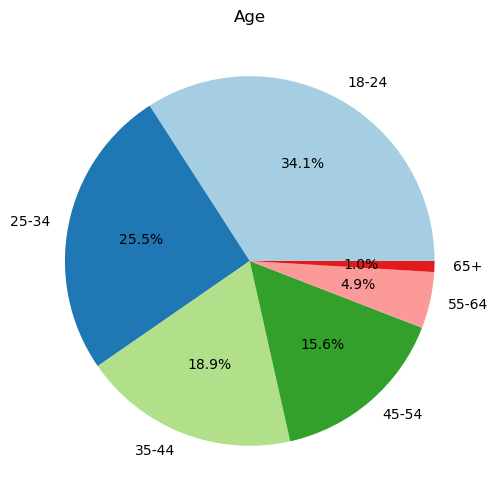

In [8]:
# 'age', 'gender', 'education', 'country'
age_mapping = { -0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', 1.82213: '55-64', 2.59171: '65+' }
sex_mapping = { 0.48246: 'Female', -0.48246: 'Male' }
education_mapping = { -2.43591: 'Left school before 16 years', -1.73790: 'Left school at 16 years', -1.43719: 'Left school at 17 years', -1.22751: 'Left school at 18 years', -0.61113: 'Some college or university, no certificate or degree', -0.05921: 'Professional certificate/ diploma', 0.45468: 'University degree', 1.16365: 'Masters degree', 1.98437: 'Doctorate degree' }
country_mapping = { -0.09765: 'Australia', 0.24923: 'Canada', -0.46841: 'New Zealand', -0.28519: 'Other', 0.21128: 'Ireland', 0.96082: 'UK', -0.57009: 'USA' }

df_copy_for_graphs['age_label'] = df_copy_for_graphs['age'].map(age_mapping)
df_copy_for_graphs['sex_label'] = df_copy_for_graphs['gender'].map(sex_mapping)
df_copy_for_graphs['education_label'] = df_copy_for_graphs['education'].map(education_mapping)
df_copy_for_graphs['country_label'] = df_copy_for_graphs['country'].map(country_mapping)

age_counts = df_copy_for_graphs['age_label'].value_counts()
sex_counts = df_copy_for_graphs['sex_label'].value_counts()
education_counts = df_copy_for_graphs['education_label'].value_counts()
country_counts = df_copy_for_graphs['country_label'].value_counts()

plt.figure(figsize=(6, 6))
age_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Age')
plt.ylabel('')
plt.show()

The age distribution isn't <i>too</i> bad. There's a decent amount of people in most groups. <br>
However, I plan on combining the '55-64' and '65+' age groups, making it '55+', just to make sure there's a decent amount of instances from each group.

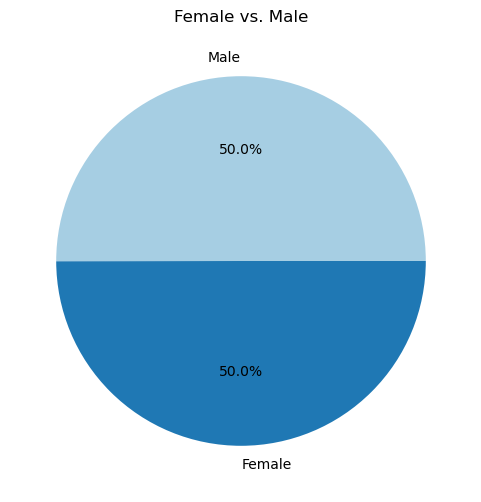

In [9]:
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Female vs. Male')
plt.ylabel('')
plt.show()

This 50/50 ratio came as a pleasant surprise. Very convenient that they managed that.

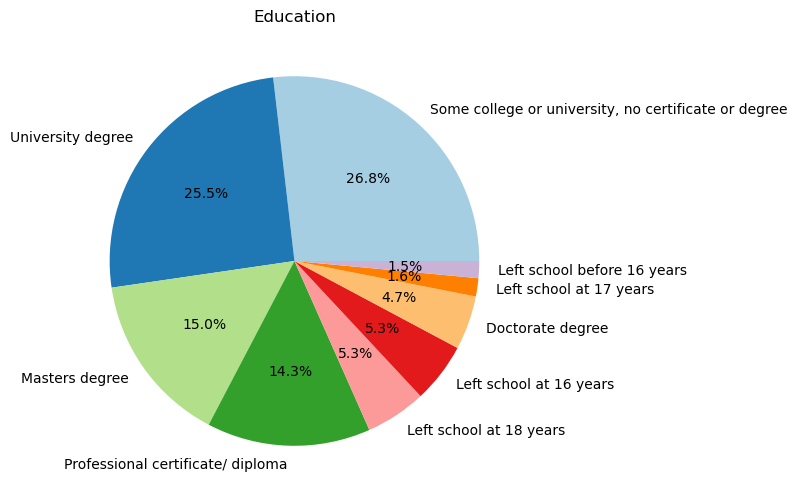

In [10]:
plt.figure(figsize=(6, 6))
education_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Education')
plt.ylabel('')
plt.show()

The distribution on education is also somewhat unbalanced. <br>
I ended up deciding to combine 'left school before age 16', 'left school at 16', 'left school at 17' and 'left school at 18'. I was a little unsure of whether I should include 'left school at 18' in there, as a legal adult leaving school may have a different experience from a child leaving school, but in the end decided to just lump them together. <br>
Bottom line is that they probably don't have a high school degree or something equivalent, and that's what I really care about.

'Doctorate degree' I left alone, since there's nothing I can obviously lump it in with. I've got to be careful not to over-generalize, anyway, as I don't want the models to underfit the data.

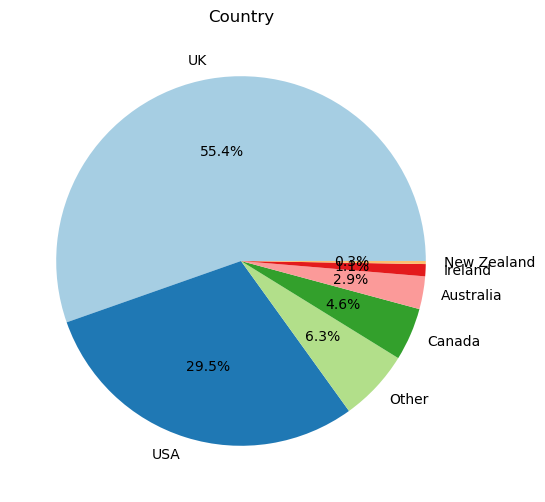

In [11]:
plt.figure(figsize=(6, 6))
country_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Country')
plt.ylabel('')
plt.show()

The distripution in the 'countries' column is also pretty steep. New Zealand and Ireland only make up 0.3% and 1.1% of respondents' nationalities, respectively. Combined, they appear in less than thirty instances. Thus I'll be lumping them both in with 'Other'.

Deciding whether or not to lump Canada in with the USA (given that they're neighbors) was another process.

In [12]:
canada_vs_usa = df[df['country'].isin([0.24923, -0.57009, 0.96082])].groupby('country')['mushrooms'] # 0.24923=Canada, -0.57009=USA

print(canada_vs_usa.value_counts(normalize=True))

country   mushrooms
-0.57009  CL3          0.292639
          CL0          0.251346
          CL2          0.188510
          CL4          0.131059
          CL1          0.086176
          CL5          0.046679
          CL6          0.003591
 0.24923  CL0          0.321839
          CL3          0.195402
          CL2          0.183908
          CL1          0.149425
          CL4          0.103448
          CL5          0.045977
 0.96082  CL0          0.704023
          CL1          0.125479
          CL2          0.104406
          CL3          0.053640
          CL4          0.007663
          CL5          0.003831
          CL6          0.000958
Name: proportion, dtype: float64


Around 4.6% of respondants were Canadian, so that's around 87 instances. If we were trying to predict whether a person has tried cannabis before it might be useful to keep Canada in there, considering cannabis is legal in Canada. However, the 'has tried'/'hasn't' ratio for magic mushrooms is very similar in both countries. That's why, in the end, I decided to lump Canada in with the USA.

It's also a worthwhile endeavour that I examine mushroom usage within the database as a whole; what percentage of repondants have never used them and, conversely, what percentage has?

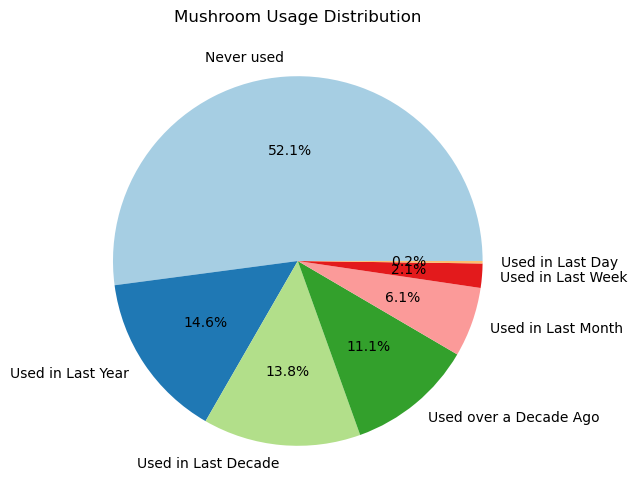

In [13]:
drug_usage_mapping = { 'CL0': 'Never used', 'CL1': 'Used over a Decade Ago', 'CL2': 'Used in Last Decade', 'CL3': 'Used in Last Year', 'CL4': 'Used in Last Month', 'CL5': 'Used in Last Week', 'CL6': 'Used in Last Day' }

df_copy_for_graphs['shroom_label'] = df_copy_for_graphs['mushrooms'].map(drug_usage_mapping)

mushroom_counts = df_copy_for_graphs['shroom_label'].value_counts()

plt.figure(figsize=(6, 6))
mushroom_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Mushroom Usage Distribution')
plt.ylabel('')  # To remove the y-axis label in the pie chart
plt.show()

A good 47.9% of respondants have tried mushrooms, which is a higher amount than I was expecting. This is good for the projects.

Given that my goal is just to predict whether a person has tried them or hasn't, I will refactor the groups into 'Hasn't' and 'Has', or 0 and 1.

Also, something I didn't notice immediately until I was working with the models is that semeron is not a real drug. It's a fictional drug, made up just to see who might be exaggerating, lying or misremembering about their drug use.

semer_label
Never used                1877
Used in Last Decade          3
Used in Last Year            2
Used over a Decade Ago       2
Used in Last Month           1
Name: count, dtype: int64


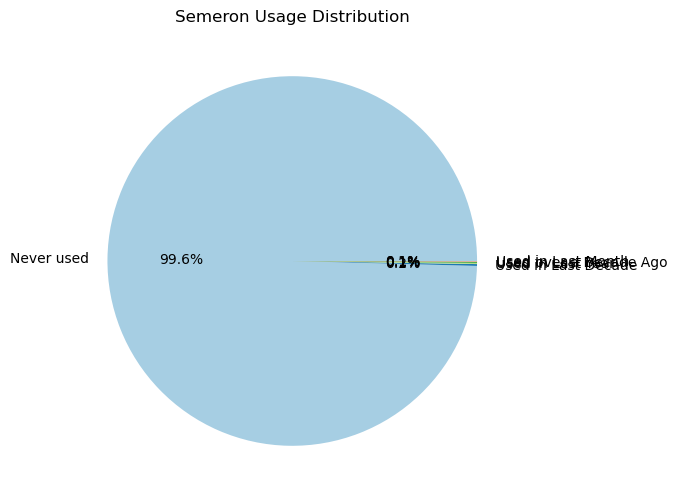

In [14]:
drug_usage_mapping = { 'CL0': 'Never used', 'CL1': 'Used over a Decade Ago', 'CL2': 'Used in Last Decade', 'CL3': 'Used in Last Year', 'CL4': 'Used in Last Month', 'CL5': 'Used in Last Week', 'CL6': 'Used in Last Day' }

df_copy_for_graphs['semer_label'] = df_copy_for_graphs['semer'].map(drug_usage_mapping)

semer_counts = df_copy_for_graphs['semer_label'].value_counts()

print(semer_counts)

plt.figure(figsize=(6, 6))
semer_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Semeron Usage Distribution')
plt.ylabel('')  # To remove the y-axis label in the pie chart
plt.show()

Only 8 people said they'd ever used it. I'm going to remove these instances from the dataframe and then remove the column, leaving me with a measly 1877 instances.

### Making the 'Mushrooms' dataframe

<ul>
Here's a summary of how I want to refactor the data for the task at hand:
    <li>Disregard the ethnicity column (not enough diversity) </li>
    <li>Combine age groups '55-64' and '65+' (individual groups too small) </li>
    <li>Combine education groups 'left school before 16 years', 'left school at 16 years', 'left school at 17 years' and 'left school at 18 years' into the group 'left school'.</li>
    <li>Combine 'Australia', 'New Zealand' and 'Ireland' with 'Other'. Combine 'Canada' with 'USA'.</li>
    <li>Split into 'Never Used' and 'Has Used' (for task at hand) (Note that this applies to the usage of every drug, not just mushrooms)</li>
    <li>Remove semeron users and the semeron column.</li>
    <li>Also take out the ID column.</li>
</ul>


I'll be replacing a lot of these values, like '0.48246' for 'Female' and '-0.48246' for 'Male', with integers. Mostly because I don't know what made them decide on these values, and I wouldn't know what values to assingn to the newly-combines groups. I'll be normalizing them again, though, to some extent.

In [15]:
df_adjusted = df.copy()
age_mapping = { -0.95197: 0, -0.07854: 1, 0.49788: 2, 1.09449: 3, 1.82213: 4, 2.59171: 4 } # note last 2 are both now 4
sex_mapping = { 0.48246: 0, -0.48246: 1 }
education_mapping = { -2.43591: 0, -1.73790: 0, -1.43719: 0, -1.22751: 0, -0.61113: 1, -0.05921: 2, 0.45468: 3, 1.16365: 4, 1.98437: 5 } # maybe a bit drastic :/
country_mapping = { -0.09765: 0, 0.24923: 1, -0.46841: 0, -0.28519: 0, 0.21128: 0, 0.96082: 2, -0.57009: 1 }

#0 for 'has not used' and 1 for 'has used'
cl_mapping = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}

# Disregarding ethnicity and ID columns
df_adjusted = df_adjusted.drop(columns=['ethnicity'])
df_adjusted = df_adjusted.drop(columns=['id'])


df_adjusted['age'] = df_adjusted['age'].map(age_mapping)
df_adjusted['gender'] = df_adjusted['gender'].map(sex_mapping)
df_adjusted['education'] = df_adjusted['education'].map(education_mapping)
df_adjusted['country'] = df_adjusted['country'].map(country_mapping)

# There might be a quicker way to do this, but figuring it out would probably take me longer than doing this copy-paste work
df_adjusted['alcohol'] = df_adjusted['alcohol'].map(cl_mapping)
df_adjusted['amphet'] = df_adjusted['amphet'].map(cl_mapping)
df_adjusted['amyl'] = df_adjusted['amyl'].map(cl_mapping)
df_adjusted['benzos'] = df_adjusted['benzos'].map(cl_mapping)
df_adjusted['caff'] = df_adjusted['caff'].map(cl_mapping)
df_adjusted['cannabis'] = df_adjusted['cannabis'].map(cl_mapping)
df_adjusted['choc'] = df_adjusted['choc'].map(cl_mapping)
df_adjusted['coke'] = df_adjusted['coke'].map(cl_mapping)
df_adjusted['crack'] = df_adjusted['crack'].map(cl_mapping)
df_adjusted['ecstasy'] = df_adjusted['ecstasy'].map(cl_mapping)
df_adjusted['heroin'] = df_adjusted['heroin'].map(cl_mapping)
df_adjusted['ketamine'] = df_adjusted['ketamine'].map(cl_mapping)
df_adjusted['legalh'] = df_adjusted['legalh'].map(cl_mapping)
df_adjusted['lsd'] = df_adjusted['lsd'].map(cl_mapping)
df_adjusted['meth'] = df_adjusted['meth'].map(cl_mapping)
df_adjusted['mushrooms'] = df_adjusted['mushrooms'].map(cl_mapping)
df_adjusted['nicotine'] = df_adjusted['nicotine'].map(cl_mapping)
df_adjusted['semer'] = df_adjusted['semer'].map(cl_mapping)
df_adjusted['vsa'] = df_adjusted['vsa'].map(cl_mapping)

# I'll also be adjusting these values, for the sake of consistency

nscore_mapping = {-3.46436: 12, -3.15735: 13, -2.75696: 14, -2.52197: 15, -2.42317: 16, -2.34360: 17, -2.21844: 18, 
                  -2.05048: 19, -1.86962: 20, -1.69163: 21, -1.55078: 22, -1.43907: 23, -1.32828: 24, -1.19430: 25,  
                  -1.05308: 26, -0.92104: 27, -0.79151: 28, -0.67825: 29, -0.58016: 30, -0.46725: 31, -0.34799: 32, 
                  -0.24649: 33, -0.14882: 34, -0.05188: 35, 0.04257: 36, 0.13606: 37, 0.22393: 38, 0.31287: 39, 
                  0.41667: 40, 0.52135: 41, 0.62967: 42, 0.73545: 43, 0.82562: 44, 0.91093: 45, 1.02119: 46, 
                  1.13281: 47, 1.23461: 48, 1.37297: 49, 1.49158: 50, 1.60383: 51, 1.72012: 52, 1.83990: 53, 
                  1.98437: 54, 2.12700: 55, 2.28554: 56, 2.46262: 57, 2.61139: 58, 2.82196: 59, 3.27393: 60}
escore_mapping = {-3.27393: 16, -3.00537: 18, -2.72827: 19, -2.53830: 20, -2.44904: 21, -2.32338: 22, -2.21069: 23, 
                  -2.11437: 24, -2.03972: 25, -1.92173: 26, -1.76250: 27, -1.63340: 28, -1.50796: 29, -1.37639: 30,
                  -1.23177: 31, -1.09207: 32, -0.94779: 33, -0.80615: 34, -0.69509: 35, -0.57545: 36, -0.43999: 37,
                  -0.30033: 38, -0.15487: 39, 0.00332: 40, 0.16767: 41, 0.32197: 42, 0.47617: 43, 0.63779: 44, 
                  0.80523: 45, 0.96248: 46, 1.11406: 47, 1.28610: 48, 1.45421: 49, 1.58487: 50, 1.74091: 51, 
                  1.93886: 52, 2.12700: 53, 2.32338: 54, 2.57309: 55, 2.85950: 56, 3.00537: 58, 3.27393: 59}
oscore_mapping = {-3.27393: 24, -2.85950: 26, -2.63199: 28, -2.39883: 29, -2.21069: 30, -2.09015: 31, -1.97495: 32,
                  -1.82919: 33, -1.68062: 34, -1.55521: 35, -1.42424: 36, -1.27553: 37, -1.11902: 38, -0.97631: 39,
                  -0.84732: 40, -0.71727: 41, -0.58331: 42, -0.45174: 43, -0.31776: 44, -0.17779: 45, -0.01928: 46,
                  0.14143: 47, 0.29338: 48, 0.44585: 49, 0.58331: 50, 0.72330: 51, 0.88309: 52, 1.06238: 53, 
                  1.24033: 54, 1.43533: 55, 1.65653: 56, 1.88511: 57, 2.15324: 58, 2.44904: 59, 2.90161: 60}
ascore_mapping = {-3.46436: 12, -3.15735: 16, -3.00537: 18, -2.90161: 23, -2.78793: 24, -2.70172: 25, -2.53830: 26,
                  -2.35413: 27, -2.21844: 28, -2.07848: 29, -1.92595: 30, -1.77200: 31, -1.62090: 32, -1.47955: 33,
                  -1.34289: 34, -1.21213: 35, -1.07533: 36, -0.91699: 37, -0.76096: 38, -0.60633: 39, -0.45321: 40,
                  -0.30172: 41, -0.15487: 42, -0.01729: 43, 0.13136: 44, 0.28783: 45, 0.43852: 46, 0.59042: 47,
                  0.76096: 48, 0.94156: 49, 1.11406: 50, 1.2861: 51, 1.45039: 52, 1.61108: 53, 1.81866: 54, 
                  2.03972: 55, 2.23427: 56, 2.46262: 57, 2.75696: 58, 3.15735: 59, 3.46436: 60}
cscore_mapping = {-3.46436: 17, -3.15735: 19, -2.90161: 20, -2.72827: 21, -2.57309: 22, -2.42317: 23, -2.30408: 24,
                  -2.18109: 25, -2.04506: 26, -1.92173: 27, -1.78169: 28, -1.64101: 29, -1.51840: 30, -1.38502: 31,
                  -1.25773: 32, -1.13788: 33, -1.01450: 34, -0.89891: 35, -0.78155: 36, -0.65253: 37, -0.52745: 38,
                  -0.40581: 39, -0.27607: 40, -0.14277: 41, -0.00665: 42, 0.12331: 43, 0.25953: 44, 0.41594: 45,
                  0.58489: 46, 0.75830: 47, 0.93949: 48, 1.13407: 49, 1.30612: 50, 1.46191: 51, 1.63088: 52, 
                  1.81175: 53, 2.04506: 54, 2.33337: 55, 2.63199: 56, 3.00537: 57, 3.46436: 59}
impulsive_mapping = {-2.55524: 0, -1.37983: 1, -0.71126: 2, -0.21712: 3, 0.19268: 4, 0.52975: 5, 0.88113: 6, 
                     1.29221: 7, 1.86203: 8, 2.90161: 9}
ss_mapping = {-2.07848: 0, -1.54858: 1, -1.18084: 2, -0.84637: 3, -0.52593: 4, -0.21575: 5, 0.07987: 6, 0.40148: 7, 
              0.76540: 8, 1.22470: 9, 1.92173: 10}


df_adjusted['nscore'] = df_adjusted['nscore'].map(nscore_mapping)
df_adjusted['escore'] = df_adjusted['escore'].map(escore_mapping)
df_adjusted['oscore'] = df_adjusted['oscore'].map(oscore_mapping)
df_adjusted['ascore'] = df_adjusted['ascore'].map(ascore_mapping)
df_adjusted['cscore'] = df_adjusted['cscore'].map(cscore_mapping)
df_adjusted['impuslive'] = df_adjusted['impuslive'].map(impulsive_mapping)
df_adjusted['ss'] = df_adjusted['ss'].map(ss_mapping)


# Finally, removing semeron and its users
df_adjusted = df_adjusted[df_adjusted['semer'] == 0]
df_adjusted = df_adjusted.drop(columns=['semer'])


df_adjusted.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impuslive,...,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,2,0,2,2,39,36,42,37,42,3,...,0,0,0,0,0,0,0,0,1,0
1,1,1,5,2,29,52,55,48,41,2,...,0,1,0,1,0,1,1,0,1,0
2,2,1,2,2,31,45,40,32,34,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,4,2,34,34,46,47,46,1,...,0,0,0,1,0,0,0,0,1,0
4,2,0,5,2,43,28,43,41,50,3,...,0,1,0,0,1,0,0,1,1,0


So far so good. We've got 1877 instances to work with now and 29 columns (one of which is the target column). <br>
I'm going to re-normalize these.

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['age', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa']

scaler = MinMaxScaler()
df_adjusted[columns_to_normalize] = scaler.fit_transform(df_adjusted[columns_to_normalize])

df_adjusted.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impuslive,...,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,0.50,0,2,2,0.562500,0.465116,0.500000,0.520833,0.595238,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,1,5,2,0.354167,0.837209,0.861111,0.750000,0.571429,0.222222,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.50,1,2,2,0.395833,0.674419,0.444444,0.416667,0.404762,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.00,0,4,2,0.458333,0.418605,0.611111,0.729167,0.690476,0.111111,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.50,0,5,2,0.645833,0.279070,0.527778,0.604167,0.785714,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


I consider the data properly prepared now. I don't think there's anything I missed. <br>
Onto splitting the set, then.

## Task #1: Design a process for finding a good model for the data set.

#### How to split the data into training / test set.

There are 1877, so somewhere around 880 people who've tried shrooms. That's a fine amount of instances to train on, so I think I can get away with a decent-sized test set. <br>
I'll go for a classic 80/20 split.

In [17]:
from sklearn.model_selection import train_test_split

df_features = df_adjusted.copy()
df_features = df_features.drop(columns=['mushrooms'])
df_targets = df_adjusted['mushrooms'] 

random_number = 33

# 80/20
df_features_train, df_features_test, df_targets_train, df_targets_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=random_number)

I'll make some extra graphs, just to make sure that my training and test sets are somewhat similar.

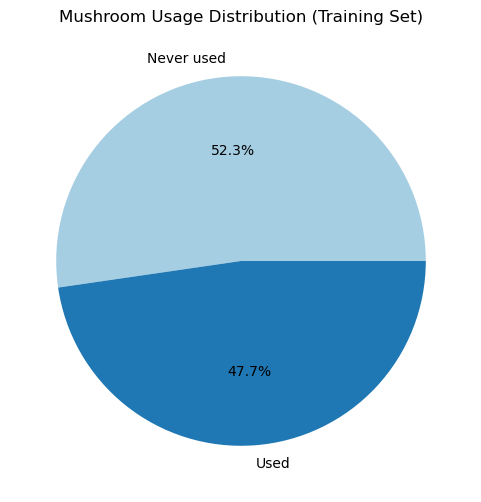

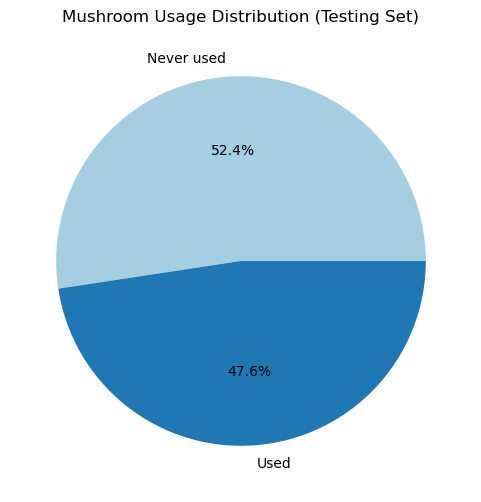

In [18]:
#for_training_set_graph = df_features_train.copy()
df_targets_train_fg = df_targets_train.copy()
df_targets_test_fg = df_targets_test.copy()

mushroom_usage_train = df_targets_train_fg.apply(lambda x: 'Used' if x != 0 else 'Never used')
mushroom_usage_test = df_targets_test_fg.apply(lambda x: 'Used' if x != 0 else 'Never used')

plt.figure(figsize=(6, 6))
mushroom_counts_train = mushroom_usage_train.value_counts()
mushroom_counts_train.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Mushroom Usage Distribution (Training Set)')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
mushroom_counts_test = mushroom_usage_test.value_counts()
mushroom_counts_test.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Mushroom Usage Distribution (Testing Set)')
plt.ylabel('')
plt.show()


I adjusted the 'random_number' variable until I got similar numbers for both sets. <br>
I just want a similar ratio of mushroom users, I don't care quite as much about the ratio of other variables and am thus not going to bother graphing them. 

#### Which models have a good chance of working well on this data set?

I've got 28 features (all columns minus the mushroom one) and 1877 instances. So that's a small/medium dataset whose dimensionality is not very high. I also have a lot more datapoints than features, so that's great.<br>
Generally, anything good for solving classification problems would do an okay job. <br>

Here are some options I considered:

- k-Nearest Neighbors. Works best with low to medium dimensional datasets, since it needs to compute the distances between the new point and every other training data point.

- Logistic regression. Performs well when the dataset is linearly separable, and I strongly believe that the dataset I'm working with isn't so (since we're working with human behavior, complex relationships between features and such).
  
- Decision tree. They have a tendency to overfit on datasets with a lot of features. I'm not sure if 28 is too many, but I plan to find out.
I think random forest and gradient boost will out-perform it, though.

- Random Forest. Works for both classification and regression problems.

- Gradient boosting. Slower to train than random forest, but I'm in no hurry.

- Support Vector Machines (SVMs). I suspect the data may contain non-linear relationships or complex decision boundaries, and SMV's are good with that sort of stuff.

- Naive Bayes. It's not designed to handle complex relationships well and can perform poorly with larger datasets. 

The models I ended up trying were:
- Gradient boosting
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Support Vector Machine

Defending my choices:
- I skipped random forest since I'm already doing gradient boosting (and they're both ensemble methods).
- Skipped out on logistic regression because I don't think it would work well with this dataset and the problem at hand.
- I included Naive Bayes just to compare its performance with the others. CategoricalNB is suitable for "classification with discrete features that are categorically distributed", so I'm going to try that and see how it goes.

### Gradient Boosting

Aside from just building the model, I'm going to use gradient boosting to see which features are most significant/important when trying to predict whether a person has tried shrooms or not. But first, of course, I'm going to build the model.

The code where I automated the process of finding the best hyperparameters is below the next code snippet, only because that code didn't work all that well for this gradient boosting model. (Note that it worked alright for the other models, though. It just worked worse for this model because its performance depends more heavily on the random_state hyperparameter). In the end, I found that just increasing the number of estimators to 120 gave an overall better performance than what the automating process found, and so I stuck with that.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

score = 0
total_better = 0
total_worse = 0

avg_accuracy = 0
avg_train_accuracy = 0
avg_combined_accuracy = 0

magic_number = 100

# Original model (hyperparams not messed with)
GB_model = GradientBoostingClassifier()
GB_model.fit(df_features_train, df_targets_train)

test_predictions = GB_model.predict(df_features_test)
train_predictions = GB_model.predict(df_features_train)

o_test_accuracy = accuracy_score(df_targets_test, test_predictions)
o_train_accuracy = accuracy_score(df_targets_train, train_predictions)
o_comb_accuracy = (o_test_accuracy+o_train_accuracy)/2


# New model
for i in range(magic_number):
    GB_model = GradientBoostingClassifier(n_estimators=120, random_state=i)
    GB_model.fit(df_features_train, df_targets_train)

    test_predictions = GB_model.predict(df_features_test)
    train_predictions = GB_model.predict(df_features_train)

    test_accuracy = accuracy_score(df_targets_test, test_predictions)
    train_accuracy = accuracy_score(df_targets_train, train_predictions)

    # accuracy
    avg_accuracy = avg_accuracy+test_accuracy
    avg_train_accuracy = avg_train_accuracy+train_accuracy
    avg_combined_accuracy = avg_combined_accuracy+((test_accuracy+train_accuracy)/2)

    # for better or for worse
    if (((test_accuracy*2)+train_accuracy) > ((o_test_accuracy*2)+o_train_accuracy)): # I multiply the test scores by 2 because I care more about them
        score=score+1
        total_better=total_better+1
    else: # very unlikely that they're the exact same
        score=score-1
        total_worse=total_worse+1
        

# can run several of these to test different params
"""
for i in range (magic_number):
    GB_model = GradientBoostingClassifier(n_estimators=110, subsample=0.8, max_depth=4,  random_state=i)
    GB_model.fit(df_features_train, df_targets_train)

    test_predictions = GB_model.predict(df_features_test)
    train_predictions = GB_model.predict(df_features_train)

    test_accuracy = accuracy_score(df_targets_test, test_predictions)
    
    # accuracy
    avg_accuracy_4 = avg_accuracy_4+test_accuracy
"""



avg_accuracy = avg_accuracy/magic_number
avg_train_accuracy = avg_train_accuracy/magic_number
avg_combined_accuracy = avg_combined_accuracy/magic_number

# A score of 0 would indicate the model is equally good, 
# a negative score would indicate that it's worse and 
# a positive score would indicate that it's better.
print("THE NEW MODEL SCORES:     ", score)
print("Times it was better:      ", total_better)
print("Times it was worse:       ", total_worse, "\n")

print("Original accuracy:        ", o_test_accuracy)
print("New accuracy:             ", avg_accuracy, "\n")




print("Original, combined accuracy:        ", o_comb_accuracy)
print("Original, training data accuracy:   ", o_train_accuracy)
print("New, combined accuracy:             ", avg_combined_accuracy)
print("New, training data accuracy:        ", avg_train_accuracy)

THE NEW MODEL SCORES:      100
Times it was better:       100
Times it was worse:        0 

Original accuracy:         0.8404255319148937
New accuracy:              0.8453723404255323 

Original, combined accuracy:         0.8705791883425235
Original, training data accuracy:    0.9007328447701533
New, combined accuracy:              0.8760505939302884
New, training data accuracy:         0.9067288474350438


I wasted an embarrassing lot of time playing around with the hyperparameters, but in the end I increased the accuracy for the test data just slightly and fit it better to the training data. An accuracy of approximately 84.5% for the test subset is not bad, and it's certainly above 50%. <br>

Here is the snippet of code I mentioned earlier, that's supposed to find the best hyperparameters out of the values provided. Again, this code didn't work well for this model in particular, so I stuck with just increasing the number of estimators to 120.

In [58]:
# (*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, 
# max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# 'c' for 'choices'
# Tried to keep variables and their values relatively few, because I can't wait for over 12 hours 
c_loss = ['log_loss', 'exponential']
c_learning_rate = [0.5, 0.1, 0.15]
c_n_estimators = [80, 100, 120]
c_subsample = [0.8, 0.9, 1.0]
c_criterion = ['friedman_mse', 'squared_error']
c_min_samples_split = [2,3]
c_min_samples_leaf = [1,2]
c_max_depth = [2,3,4]

results = []

for loss in c_loss:
    for rate in c_learning_rate:
        for num_est in c_n_estimators:
            for sample_s in c_subsample:
                for crit in c_criterion:
                    for split in c_min_samples_split:
                        for leaf in c_min_samples_leaf:
                            for depth in c_max_depth:
                                GB_model = GradientBoostingClassifier(loss=loss, learning_rate=rate, n_estimators=num_est, subsample=sample_s, criterion=crit, min_samples_split=split, min_samples_leaf=leaf, max_depth=depth, random_state=12)
                                GB_model.fit(df_features_train, df_targets_train) 
                                predictions = GB_model.predict(df_features_test)
                                test_accuracy = accuracy_score(df_targets_test, predictions)
                                            
                                test_desc_str = f"{loss} + {rate} + {num_est} + {sample_s} + {crit} + {split} + {leaf} + {depth}" # Description of the test at hand
                                results.append((test_desc_str, round(test_accuracy*100, 3))) # storing test #, description and accuracy


df_results = pd.DataFrame(results, columns=["Description", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)



                                            Description  Accuracy
1181  exponential + 0.15 + 100 + 0.9 + friedman_mse ...    85.372
1187  exponential + 0.15 + 100 + 0.9 + friedman_mse ...    85.372
1115  exponential + 0.15 + 80 + 0.9 + friedman_mse +...    85.106
545   log_loss + 0.15 + 100 + 0.9 + squared_error + ...    85.106
1109  exponential + 0.15 + 80 + 0.9 + friedman_mse +...    85.106
...                                                 ...       ...
169   log_loss + 0.5 + 120 + 0.9 + friedman_mse + 2 ...    79.787
154   log_loss + 0.5 + 120 + 0.8 + friedman_mse + 3 ...    79.787
44    log_loss + 0.5 + 80 + 0.9 + squared_error + 3 ...    79.521
109   log_loss + 0.5 + 100 + 0.9 + squared_error + 2...    79.521
97    log_loss + 0.5 + 100 + 0.9 + friedman_mse + 2 ...    79.521

[1296 rows x 2 columns]


Here's how accurate these models truly are:

In [66]:
magic_number = 100
avg_accuracy_1 = 0
avg_accuracy_2 = 0

for i in range(magic_number):
    GB_model = GradientBoostingClassifier(loss='exponential', learning_rate=0.15, n_estimators=100, subsample=0.9, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=2, max_depth=4, random_state=i)
    GB_model.fit(df_features_train, df_targets_train)
    test_predictions = GB_model.predict(df_features_test)
    test_accuracy = accuracy_score(df_targets_test, test_predictions)
    avg_accuracy_1 = avg_accuracy_1+test_accuracy

for i in range(magic_number):
    GB_model = GradientBoostingClassifier(loss='exponential', learning_rate=0.15, n_estimators=100, subsample=0.9, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=2, max_depth=4, random_state=i)
    GB_model.fit(df_features_train, df_targets_train)
    test_predictions = GB_model.predict(df_features_test)
    test_accuracy = accuracy_score(df_targets_test, test_predictions)
    avg_accuracy_2 = avg_accuracy_2+test_accuracy

avg_accuracy_1 = avg_accuracy_1/magic_number
avg_accuracy_2 = avg_accuracy_2/magic_number

print(avg_accuracy_1)
print(avg_accuracy_2)

0.8342819148936169
0.8342819148936169


As you can see, the hyperparameters I found by hand were better. I could adjust the code so that it finds the average accuracy for each set of hyperparameters, but that would take such a ridiculously long time that it's just not doable for this project.

Now I'm going to check what the most important variables are according to this model, in predicting whether an individual has tried shrooms or not.

In [21]:
#model.feature_importances_

In [248]:
GB_importance = pd.DataFrame({'Lvl. of importance:': GB_model.feature_importances_}, index=df_features_train.columns)
GB_importance.sort_values('Lvl. of importance:', ascending=False)

,Lvl. of importance:
lsd,0.586173
legalh,0.085309
oscore,0.032166
nscore,0.030060
ecstasy,0.029787
escore,0.023548
cscore,0.021623
ascore,0.020447
coke,0.019762
cannabis,0.019623


I did expect LSD-usage and openess to experience to be two major contributing factors. The legal highs and euroticism are a surprise. Very intriguing. Ecstacy is also a psychadelic, so it seems that people who are into psychadelics are more likely to be into magic mushrooms that your average Joe. The biggest player by far though seems to be LSD.

The two at the bottom that don't seem to have any correlation with mushroom usage are chocolate and caffeine. Not a huge surprise.<br>
We could remove these variables and decrease the dimensionality of the data, which is exactly what I'm going to do before I try making other models.

In [23]:
df_features_train = df_features_train.drop(columns=['caff', 'choc'])
df_features_test = df_features_test.drop(columns=['caff', 'choc'])

In [24]:
df_features_train.columns

Index(['age', 'gender', 'education', 'country', 'nscore', 'escore', 'oscore',
       'ascore', 'cscore', 'impuslive', 'ss', 'alcohol', 'amphet', 'amyl',
       'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalh', 'lsd', 'meth', 'nicotine', 'vsa'],
      dtype='object')

I could also remove more columns that appear at the bottom of the importance list, but I think I'll just do that if I think I really need to decrease the dimensionality at some point. Note that these columns will be missing for all future models.

### K-Nearest Neighbors

Deciding the hyperparameters myself, I tried different numbers of neighbors ranging from two to ten, but it seems that five neighbors is a sweet spot.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_features_train, df_targets_train) 
predictions = knn.predict(df_features_test)
test_accuracy = accuracy_score(df_targets_test, predictions)

print(test_accuracy)

0.8430851063829787


K-Nearest Neighbors works better for this problem than I expected, with an approximate 84.3% accuracy. Very close to the accuracy of the gradient boosting classifier.

Let's see if I can get some better hyperparameters.

In [54]:
# (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]

# 'c' for 'choices'
c_n_neighbors = [3,4,5,6,7]
c_weights = ['uniform', 'distance']
c_algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
c_leaf_size = [20,25,30,35,40]
c_metric = ['minkowski', 'manhattan', 'euclidean']

results = []

for neighbor in c_n_neighbors:
    for weight in c_weights:
        for alg in c_algorithm:
            for ls in c_leaf_size:
                for m in c_metric:
                    count += 1
                    
                    knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight, algorithm=alg, leaf_size=ls, metric=m)
                    knn.fit(df_features_train, df_targets_train) 
                    predictions = knn.predict(df_features_test)
                    test_accuracy = accuracy_score(df_targets_test, predictions)

                    test_desc_str = f"{neighbor} + {weight} + {alg} + {ls} + {m}" # Description of the test at hand
                    results.append((test_desc_str, round(test_accuracy*100, 3))) # storing test #, description and accuracy


In [55]:
df_results = pd.DataFrame(results, columns=["Description", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

                                  Description  Accuracy
508  7 + uniform + ball_tree + 40 + manhattan    85.106
505  7 + uniform + ball_tree + 35 + manhattan    85.106
532      7 + uniform + brute + 30 + manhattan    85.106
526      7 + uniform + brute + 20 + manhattan    85.106
523    7 + uniform + kd_tree + 40 + manhattan    85.106
..                                        ...       ...
143  4 + uniform + ball_tree + 30 + euclidean    82.181
144  4 + uniform + ball_tree + 35 + minkowski    82.181
146  4 + uniform + ball_tree + 35 + euclidean    82.181
147  4 + uniform + ball_tree + 40 + minkowski    82.181
129       4 + uniform + auto + 35 + minkowski    82.181

[600 rows x 2 columns]


By automating the process of testing different models, I was able to optimize it to approximately 85%. That's pretty epic. <br>
It seems that it's most optimal to use the manhattan distance, a leaf size of any of these values, any of the algorithms, uniform weights and 7 neighbors.

In [26]:
predictions_2 = knn.predict(df_features_train)
train_accuracy = accuracy_score(df_targets_train,predictions_2)
print("Training accuracy:", train_accuracy)
print("Combined accuracy:", (train_accuracy+test_accuracy)/2)

Training accuracy: 0.8580946035976016
Combined accuracy: 0.8505898549902902


Compared this to the gradient boosting model's approximate 90.7% accuracy rate for the training data, this model is less snugly fitted to the training data. Here, the difference in the accuracy rate of the test data vs. the training data is very small, only around 1.5%.

As for the other model, I'll also compute the precision and recall.

In [27]:
precision = precision_score(df_targets_test, predictions)
recall = recall_score(df_targets_test, predictions)ball_tree

print("Precision: ", precision)
print("Recall:    ", recall)

Precision:  0.8157894736842105
Recall:     0.8659217877094972


### Naive-Bayes Classifier

I wanted to also make a naive-bayes model, mostly to compare to the other (better) models.

I'll be using the CategoricalNB, which is most suitable for classification with discrete features that are categorically distributed. 

In [105]:
from sklearn.naive_bayes import CategoricalNB

CNB_model = CategoricalNB()
CNB_model.fit(df_features_train, df_targets_train)

predictions = CNB_model.predict(df_features_test)

print("Accuracy:  ", accuracy_score(df_targets_test,predictions))
print("Precision: ", precision_score(df_targets_test, predictions))
print("Recall:    ", recall_score(df_targets_test, predictions))

Accuracy:   0.8111702127659575
Precision:  0.7842105263157895
Recall:     0.8324022346368715


It still did pretty good, 81.1% comes pretty close to 84.5%. <br>
Now I'm going to see if I can optimize that any more.

In [104]:
# (*, alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None, min_categories=None)

# 'c' for 'choices'
c_alpha = [5.0, 1.0, 0.1]
fit_prior = [True, False]
results = []

for a in c_alpha:
    for fp in fit_prior:
            CNB_model = CategoricalNB(alpha=a, force_alpha=fa, fit_prior=fp)
            CNB_model.fit(df_features_train, df_targets_train) 
            predictions = CNB_model.predict(df_features_test)
            test_accuracy = accuracy_score(df_targets_test, predictions)

            test_desc_str = f"{a} + {fp}" # Description of the test at hand
            results.append((test_desc_str, round(test_accuracy*100, 3))) # storing test #, description and accuracy

df_results = pd.DataFrame(results, columns=["Description", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

   Description  Accuracy
3  1.0 + False    81.383
5  0.1 + False    81.383
1  5.0 + False    81.117
2   1.0 + True    81.117
4   0.1 + True    81.117
0   5.0 + True    80.851


The answer is: not by much, it seems. <br>
According to these results, it would be a good idea to set class_prior (whether to learn class prior probabilities or not) to False. <br>
We've optimized from an accuracy of 81.11% to an accuracy of 81.38%. Note that .27% of the test set is around one person, so this is not really significant.

### Decision Tree

Setting max_depth to 5 as it seems like a sweet spot. Not going to mess around with any of the other parameters, I'll let the code work those out for me.

In [268]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=5, random_state=5318008)
DT_model.fit(df_features_train, df_targets_train)
predictions = DT_model.predict(df_features_test)
test_accuracy = accuracy_score(df_targets_test, predictions)
test_accuracy

0.8457446808510638

84.5% accuracy is the highest number we've gotten from a model pre-adjustment. This is looking to be good.

In [270]:
# (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
# max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, 
# ccp_alpha=0.0, monotonic_cst=None)

# 'c' for 'choices'
c_criterion = ['gini', 'entropy', 'log_loss']
c_splitter = ['best', 'random']
c_max_depth = [None,3,4,5,6]
c_min_samples_split = [2,3]
c_min_samples_leaf = [1,2,3]
c_min_weight_fraction_leaf = [0.0,0.25,0.5]
c_max_features = [None,'sqrt','log2']
c_class_weight = [None, 'balanced']

results = []

for c in c_criterion:
    for s in c_splitter:
        for m in c_max_depth:
            for ms in c_min_samples_split:
                for sl in c_min_samples_leaf:
                    for mw in c_min_weight_fraction_leaf:
                        for mf in c_max_features:
                            for cw in c_class_weight:
                                DT_model = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m, min_samples_split=ms, min_samples_leaf=sl, min_weight_fraction_leaf=mw, max_features=mf, class_weight=cw, random_state=5318008)
                                DT_model.fit(df_features_train, df_targets_train) 
                                predictions = DT_model.predict(df_features_test)
                                test_accuracy = accuracy_score(df_targets_test, predictions)

                                test_desc_str = f"{c} + {s} + {m} + {ms} + {sl} + {mw} + {mf} + {cw}" # Description of the test at hand
                                results.append((test_desc_str, round(test_accuracy*100, 3))) # storing test #, description and accuracy

df_results = pd.DataFrame(results, columns=["Description", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

                                            Description  Accuracy
235     gini + best + 4 + 2 + 2 + 0.0 + None + balanced    85.106
289     gini + best + 4 + 3 + 2 + 0.0 + None + balanced    85.106
271     gini + best + 4 + 3 + 1 + 0.0 + None + balanced    85.106
253     gini + best + 4 + 2 + 3 + 0.0 + None + balanced    85.106
217     gini + best + 4 + 2 + 1 + 0.0 + None + balanced    85.106
...                                                 ...       ...
305     gini + best + 4 + 3 + 2 + 0.5 + log2 + balanced    47.606
303     gini + best + 4 + 3 + 2 + 0.5 + sqrt + balanced    47.606
769   gini + random + 4 + 2 + 1 + 0.5 + None + balanced    47.606
301     gini + best + 4 + 3 + 2 + 0.5 + None + balanced    47.606
3239  log_loss + random + 6 + 3 + 3 + 0.5 + log2 + b...    47.606

[3240 rows x 2 columns]


So the best hyperparameters seem so consist of: <br>
'gini' (default), 'best' (default), 4, 2 (default), 2, 0.0 (default), None and 'balanced'. 

As to not leave this model out, I'm going to compute its recall and precision.

In [271]:

DT_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, max_features=None, class_weight='balanced', random_state=5318008)
DT_model.fit(df_features_train, df_targets_train)
predictions = DT_model.predict(df_features_test)

print("Accuracy:  ", accuracy_score(df_targets_test,predictions))
print("Precision: ", precision_score(df_targets_test, predictions))
print("Recall:    ", recall_score(df_targets_test, predictions))

Accuracy:   0.851063829787234
Precision:  0.8059701492537313
Recall:     0.9050279329608939


It's notable that precision is quite a lot higher than recall, meaning that the model is a tad conservative in its positive predictions. So it prioritizes accuracy over capturing all instances where someone has tried mushrooms. Which is fine and cool. But notable.

### Support Vector Machine

For the hyperparameters, I manually chose 'poly' for polynomial kernel, set gamma to 'auto' (compared to the default, it did not make any difference in terms of accuracy, but made precision and recall a bit closer  to each other), kept the class weights balanced since (as shown in a graph earlier in this report) close to half of the participants have tried magic mushrooms and the other half hasn't.

In [29]:
from sklearn.svm import SVC # "C-Support Vector Classification"

SVM_model = SVC(kernel='poly',gamma='auto',class_weight='balanced')
SVM_model.fit(df_features_train, df_targets_train)

predictions = SVM_model.predict(df_features_test)

print("Accuracy:  ", accuracy_score(df_targets_test,predictions))
print("Precision: ", precision_score(df_targets_test, predictions))
print("Recall:    ", recall_score(df_targets_test, predictions))

Accuracy:   0.848404255319149
Precision:  0.8351648351648352
Recall:     0.8491620111731844


This seems to be the most accurate (pre-optimization) model so far, with an approximate 84.8% accuracy for the test data.

Like for the other models, I'll also compute precision and recall for the training data. As always, just to make sure we're not overfitting or anything.

In [30]:
predictions = SVM_model.predict(df_features_train)

print("Accuracy:  ", accuracy_score(df_targets_train,predictions))
print("Precision: ", precision_score(df_targets_train, predictions))
print("Recall:    ", recall_score(df_targets_train, predictions))

Accuracy:   0.860093271152565
Precision:  0.8533519553072626
Recall:     0.8533519553072626


Of course, I'll also go with the automated method to see if we can get a better model.

In [68]:
# (*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
# verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]


# degreeint, default=3
# Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

# 'c' for 'choices'
c_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
c_degree = [1,2,3,4,5] # only significant for 'poly'
c_gamma = ['scale', 'auto']
c_coef0 = [0.0,0.1,0.2] # only significant for poly and sigmoid
c_shrinking = [True, False]
c_probability = [True, False] # random state only matters when probability is true
c_class_weight = [None,'balanced']


results = []

# could've added some if-statements to decrease the amount of time this takes to generate, but I forgot
for kernel in c_kernel:
    for degree in c_degree:
        for gamma in c_gamma:
            for coeff in c_coef0:
                for shrink in c_shrinking:
                    for prob in c_probability:
                        for weight in c_class_weight:
                    
                            SVM_model = SVC(kernel=kernel, degree=degree, gamma=gamma, coef0=coeff, shrinking=shrink, probability=prob, class_weight=weight, random_state=8)
                            SVM_model.fit(df_features_train, df_targets_train)

                            predictions = SVM_model.predict(df_features_test)
                            test_accuracy = accuracy_score(df_targets_test,predictions)

                            test_desc_str = f"{kernel} + {degree} + {gamma} + {coeff} + {shrink} + {prob} + {weight}" # Description of the test at hand
                            results.append((test_desc_str, round(test_accuracy*100, 3))) # storing test #, description and accuracy


In [69]:
df_results = pd.DataFrame(results, columns=["Description", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

                                           Description  Accuracy
465     poly + 5 + auto + 0.1 + True + True + balanced    85.372
471   poly + 5 + auto + 0.1 + False + False + balanced    85.372
467    poly + 5 + auto + 0.1 + True + False + balanced    85.372
469    poly + 5 + auto + 0.1 + False + True + balanced    85.372
441    poly + 5 + scale + 0.1 + True + True + balanced    85.106
..                                                 ...       ...
813  sigmoid + 2 + auto + 0.2 + False + True + bala...    41.755
812     sigmoid + 2 + auto + 0.2 + False + True + None    41.755
811  sigmoid + 2 + auto + 0.2 + True + False + bala...    41.755
810     sigmoid + 2 + auto + 0.2 + True + False + None    41.755
959  sigmoid + 5 + auto + 0.2 + False + False + bal...    41.755

[960 rows x 2 columns]


This confirms that I was right in choosing 'poly', 'auto' and 'balanced', but revealed to me that I should also be using 5 degrees and a coefficient of 0.1. Unsure why, for now. 

In [72]:
SVM_model = SVC(kernel='poly', degree=5, gamma='auto', coef0=0.1, class_weight='balanced')
SVM_model.fit(df_features_train, df_targets_train)
predictions = SVM_model.predict(df_features_test)
test_accuracy = accuracy_score(df_targets_test,predictions)
precision = precision_score(df_targets_test, predictions)
recall = recall_score(df_targets_test, predictions)

print("Accuracy:  ", test_accuracy)
print("Precision: ", precision)
print("Recall:    ", recall)

0.8537234042553191

An accuracy of 85.3%. That's good.

## Which model was the best?

Overall, all of the models were very similar. <br>
I'll make some confusion matrices for all of the optimized models. <br>

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def graph_confusion_matrix(predictions, title):
    """0 = hasn't used, 1 = has used"""
    cm = confusion_matrix(df_targets_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

def specific_graph():
    """Moved this up here purely for the aesthetic."""
    models = ['GB', 'KNN', 'NB', 'DT', 'SVM']
    predicted_tried = [193, 193, 191, 201, 182]
    predicted_not_tried = [183, 183, 185, 175, 194]
    bar_width = 0.45
    index = np.arange(len(models))
    fig, ax = plt.subplots()
    bar1 = ax.bar(index, predicted_tried, bar_width, label='Tried')
    bar2 = ax.bar(index + bar_width, predicted_not_tried, bar_width, label='Not Tried')
    ax.set_xlabel('Models')
    ax.set_ylabel('Participants')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()
    plt.show()

##### Gradient Boosting

In [281]:
GB_model = GradientBoostingClassifier(n_estimators=120)
GB_model.fit(df_features_train, df_targets_train)
predictions = GB_model.predict(df_features_test)
accuracy_gb = accuracy_score(df_targets_test, predictions)
precision_gb = precision_score(df_targets_test, predictions)
recall_gb = recall_score(df_targets_test, predictions)

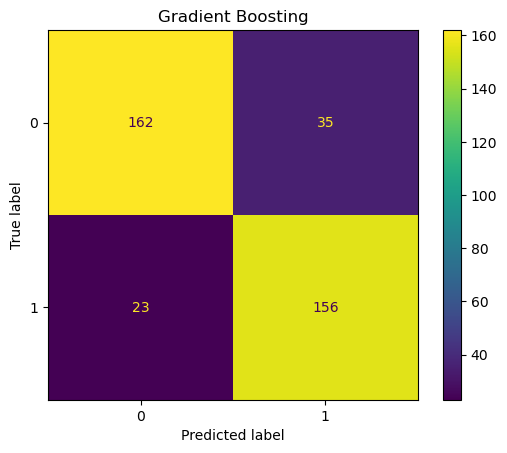

In [282]:
graph_confusion_matrix(predictions, "Gradient Boosting")

162 were correctly predicted not to have tried mushrooms, 35 were falsely predicted to have tried mushrooms. <br>
23 were incorrectly predicted as not having tried mushrooms, 156  were correctly predicted to have tried mushrooms.

##### K-Nearest Neighbors

In [283]:
# 7 + uniform + ball_tree + 40 + manhattan
KNN_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='ball_tree', leaf_size=40, metric='manhattan')
KNN_model.fit(df_features_train, df_targets_train) 
predictions = KNN_model.predict(df_features_test)
accuracy_knn = accuracy_score(df_targets_test, predictions)
precision_knn = precision_score(df_targets_test, predictions)
recall_knn = recall_score(df_targets_test, predictions)

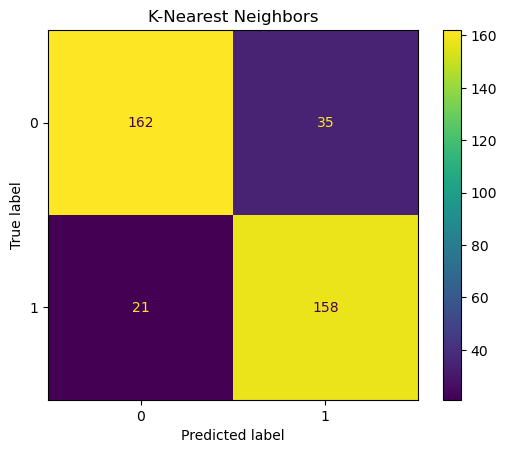

In [284]:
graph_confusion_matrix(predictions, "K-Nearest Neighbors")

162 were correctly predicted not to have tried mushrooms, 35 were falsely predicted to have tried mushrooms. <br>
21 were incorrectly predicted as not having tried mushrooms, 158  were correctly predicted to have tried mushrooms.

##### Naive Bayes

In [285]:
CNB_model = CategoricalNB(fit_prior=False)
CNB_model.fit(df_features_train, df_targets_train) 
predictions = CNB_model.predict(df_features_test)
accuracy_nb = accuracy_score(df_targets_test, predictions)
precision_nb = precision_score(df_targets_test, predictions)
recall_nb = recall_score(df_targets_test, predictions)

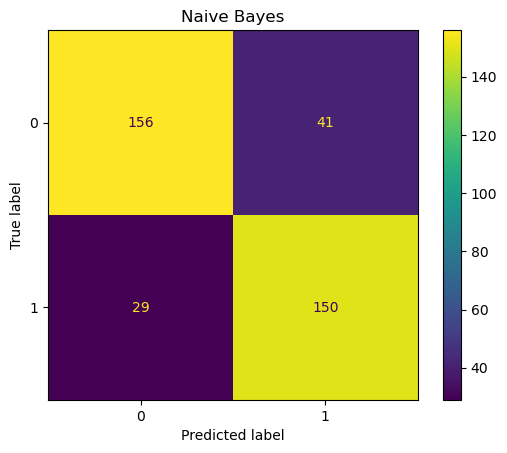

In [286]:
graph_confusion_matrix(predictions, "Naive Bayes")

156 were correctly predicted not to have tried mushrooms, 41 were falsely predicted to have tried mushrooms. <br>
29 were incorrectly predicted as not having tried mushrooms, 150  were correctly predicted to have tried mushrooms.

#### Decision Tree

In [287]:
DT_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, max_features=None, class_weight='balanced', random_state=5318008)
DT_model.fit(df_features_train, df_targets_train)
predictions = DT_model.predict(df_features_test)
accuracy_dt = accuracy_score(df_targets_test, predictions)
precision_dt = precision_score(df_targets_test, predictions)
recall_dt = recall_score(df_targets_test, predictions)

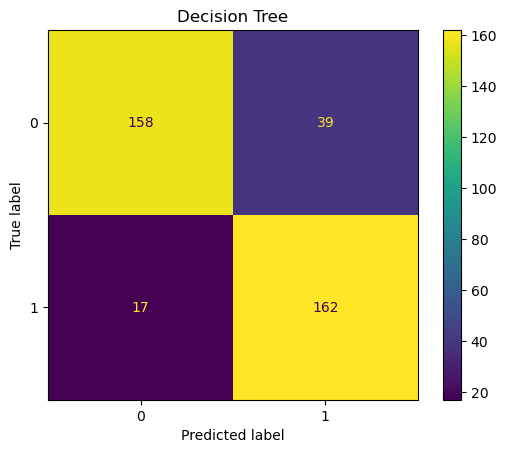

In [288]:
graph_confusion_matrix(predictions, "Decision Tree")

158 were correctly predicted not to have tried mushrooms, 39 were falsely predicted to have tried mushrooms. <br>
17 were incorrectly predicted as not having tried mushrooms, 162 were correctly predicted to have tried mushrooms.

##### SVM

In [289]:
SVM_model = SVC(kernel='poly', degree=5, gamma='auto', coef0=0.1, class_weight='balanced')
SVM_model.fit(df_features_train, df_targets_train)
predictions = SVM_model.predict(df_features_test)
accuracy_svm = accuracy_score(df_targets_test,predictions)
precision_svm = precision_score(df_targets_test, predictions)
recall_svm = recall_score(df_targets_test, predictions)

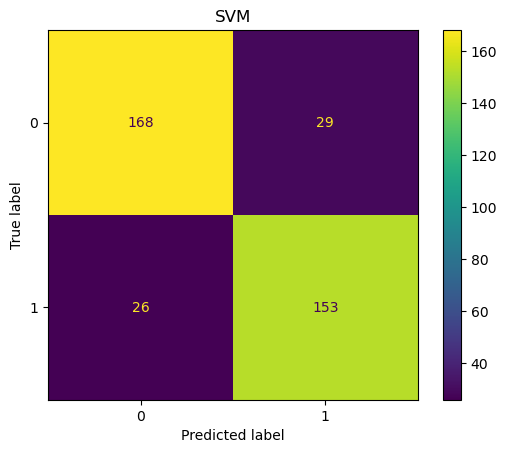

In [290]:
graph_confusion_matrix(predictions, "SVM")

168 were correctly predicted not to have tried mushrooms, 29 were falsely predicted to have tried mushrooms. <br>
26 were incorrectly predicted as not having tried mushrooms, 153  were correctly predicted to have tried mushrooms.

In [292]:
print("\tACCURACY \t PRECISION \t RECALL")
print("GB\t", round((accuracy_gb*100),2), "\t\t", round((precision_gb*100),2), "\t\t", round((recall_gb*100),2))
print("KNN\t", round((accuracy_knn*100),2), "\t\t", round((precision_knn*100),2), "\t\t", round((recall_knn*100),2))
print("NB\t", round((accuracy_nb*100),2), "\t\t", round((precision_nb*100),2), "\t\t", round((recall_nb*100),2))
print("DT\t", round((accuracy_dt*100),2), "\t\t", round((precision_dt*100),2), "\t\t", round((recall_dt*100),2))
print("SVM\t", round((accuracy_svm*100),2), "\t\t", round((precision_svm*100),2), "\t\t", round((recall_svm*100),2))

	ACCURACY 	 PRECISION 	 RECALL
GB	 84.57 		 81.68 		 87.15
KNN	 85.11 		 81.87 		 88.27
NB	 81.38 		 78.53 		 83.8
DT	 85.11 		 80.6 		 90.5
SVM	 85.37 		 84.07 		 85.47



Accuracy
- SVM
- KNN/DT
- GB
- NB

Precision
- SVM
- KNN
- GB
- DT
- NB

Recall
- DT
- KNN
- GB
- SVM
- NB



#### GB model:
3rd place for accuracy, precision and recall.

162 were correctly predicted not to have tried mushrooms, 35 were falsely predicted to have tried mushrooms. <br>
21 were incorrectly predicted as not having tried mushrooms, 158  were correctly predicted to have tried mushrooms.

Total predicted to have tried mushrooms: 193<br>
Total predicted not to have tried mushrooms: 183<br>

#### kNN model:
2nd place for accuracy and precision, 1st place for recall.

162 were correctly predicted not to have tried mushrooms, 35 were falsely predicted to have tried mushrooms. <br>
21 were incorrectly predicted as not having tried mushrooms, 158 were correctly predicted to have tried mushrooms.

Total predicted to have tried mushrooms: 193<br>
Total predicted not to have tried mushrooms: 183<br>

#### NB model:
4th place in accuracy, 5th for precision and recall.

156 were correctly predicted not to have tried mushrooms, 41 were falsely predicted to have tried mushrooms. <br>
29 were incorrectly predicted as not having tried mushrooms, 150 were correctly predicted to have tried mushrooms.

Total predicted to have tried mushrooms: 191<br>
Total predicted not to have tried mushrooms: 185<br>

#### DT model:
2nd place in accuracy, 4th for precision and 1st for recall.

158 were correctly predicted not to have tried mushrooms, 39 were falsely predicted to have tried mushrooms. <br>
17 were incorrectly predicted as not having tried mushrooms, 162 were correctly predicted to have tried mushrooms.

Total predicted to have tried mushrooms: 201<br>
Total predicted not to have tried mushrooms: 175<br>

#### SVM model:
1st place in accuracy and precision, 4th in recall.

168 were correctly predicted not to have tried mushrooms, 29 were falsely predicted to have tried mushrooms. <br>
26 were incorrectly predicted as not having tried mushrooms, 153  were correctly predicted to have tried mushrooms.

Total predicted to have tried mushrooms: 182<br>
Total predicted not to have tried mushrooms: 194<br>

Unlike the other models, the SVM model doesn't overestimate the number of people trying shrooms. This is perhaps why it has the best accuracy.

Here's a plot that shows the difference visually (felt the urge to add more graphs).

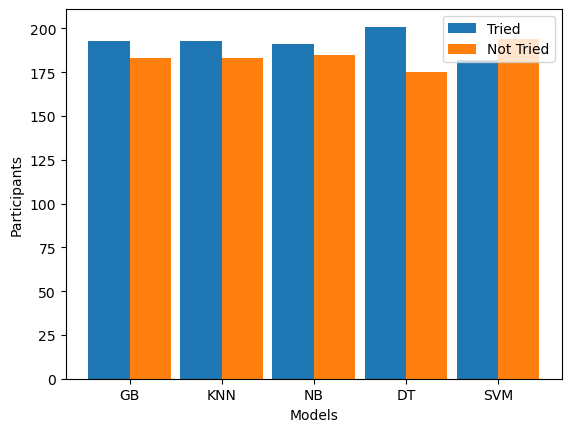

In [294]:
specific_graph()

### Final Decision

Overall, it's pretty obvious that the SVM model is the best out of all four.<br>
It looks the best on the graph above. It placed first in accuracy and precision. Granted, it did place fourth in recall, so it's missing some instances where a person had actually tried shrooms. If catching everyone who could've possibly tried shrooms at some point was a priority to me, I might go with the decision tree model (which overestimates the number of people trying shrooms). However, it is not really a priority, and so I pick the Support Vector Machine model.